# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import tensorflow.keras as keras
import itertools


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-3, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.99]
OPTIMIZER = ['SGD', 'RMSprop', 'Adagrad', 'Adam']

In [7]:
results = {}
for lr, momentum, opt in itertools.product(LEARNING_RATE, MOMENTUM, OPTIMIZER):
    keras.backend.clear_session()
    print("Experiment with LR = %.6f, Momentum = %.2f, Optimizer = %s" % (lr, momentum, opt))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    if opt == 'SGD':
        optimizer = keras.optimizers.SGD(lr=lr, nesterov=True,  momentum=momentum)
    elif opt == 'RMSprop':
        optimizer = keras.optimizers.RMSprop(lr=lr,  momentum=momentum)
    elif opt == 'Adagrad':
        optimizer = keras.optimizers.Adagrad(lr=lr)    
    elif opt == 'Adam':
        optimizer = keras.optimizers.Adam(lr=lr)
        
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True)
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s-optimizer-%s" % (str(lr), str(momentum), str(opt))
    results[exp_name_tag] = {'train-loss': train_loss,
                            'valid-loss': valid_loss,
                            'train-acc': train_acc,
                            'valid-acc': valid_acc}

Experiment with LR = 0.100000, Momentum = 0.70, Optimizer = SGD
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] -

196/196 [==============================] - 1s 3ms/step - loss: 0.7014 - accuracy: 0.7463 - val_loss: 1.9789 - val_accuracy: 0.4777
Experiment with LR = 0.100000, Momentum = 0.70, Optimizer = RMSprop
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trai

Epoch 50/50
196/196 [==============================] - 1s 3ms/step - loss: 2.3155 - accuracy: 0.0983 - val_loss: 2.3142 - val_accuracy: 0.1000
Experiment with LR = 0.100000, Momentum = 0.70, Optimizer = Adagrad
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,

Epoch 50/50
196/196 [==============================] - 1s 3ms/step - loss: 0.8419 - accuracy: 0.6976 - val_loss: 1.7961 - val_accuracy: 0.4735
Experiment with LR = 0.100000, Momentum = 0.70, Optimizer = Adam
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890

Epoch 50/50
196/196 [==============================] - 1s 3ms/step - loss: 2.3068 - accuracy: 0.0976 - val_loss: 2.3090 - val_accuracy: 0.1000
Experiment with LR = 0.100000, Momentum = 0.99, Optimizer = SGD
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890


Epoch 50/50
196/196 [==============================] - 1s 3ms/step - loss: 2.3079 - accuracy: 0.0997 - val_loss: 2.3039 - val_accuracy: 0.1000
Experiment with LR = 0.100000, Momentum = 0.99, Optimizer = RMSprop
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,

Epoch 50/50
196/196 [==============================] - 1s 3ms/step - loss: 2.4477 - accuracy: 0.0989 - val_loss: 2.4162 - val_accuracy: 0.1000
Experiment with LR = 0.100000, Momentum = 0.99, Optimizer = Adagrad
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,

Epoch 50/50
196/196 [==============================] - 1s 3ms/step - loss: 0.8018 - accuracy: 0.7123 - val_loss: 1.8218 - val_accuracy: 0.4677
Experiment with LR = 0.100000, Momentum = 0.99, Optimizer = Adam
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890

Epoch 50/50
196/196 [==============================] - 1s 3ms/step - loss: 2.3067 - accuracy: 0.1007 - val_loss: 2.3075 - val_accuracy: 0.1000
Experiment with LR = 0.001000, Momentum = 0.70, Optimizer = SGD
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890


Epoch 50/50
196/196 [==============================] - 1s 3ms/step - loss: 1.4474 - accuracy: 0.4948 - val_loss: 1.5172 - val_accuracy: 0.4689
Experiment with LR = 0.001000, Momentum = 0.70, Optimizer = RMSprop
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,

Epoch 50/50
196/196 [==============================] - 1s 3ms/step - loss: 1.1312 - accuracy: 0.5962 - val_loss: 1.7716 - val_accuracy: 0.4740
Experiment with LR = 0.001000, Momentum = 0.70, Optimizer = Adagrad
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,

Epoch 50/50
196/196 [==============================] - 1s 3ms/step - loss: 1.5199 - accuracy: 0.4719 - val_loss: 1.5418 - val_accuracy: 0.4630
Experiment with LR = 0.001000, Momentum = 0.70, Optimizer = Adam
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890

Epoch 50/50
196/196 [==============================] - 1s 3ms/step - loss: 0.6833 - accuracy: 0.7553 - val_loss: 1.8171 - val_accuracy: 0.5031
Experiment with LR = 0.001000, Momentum = 0.99, Optimizer = SGD
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890


Epoch 50/50
196/196 [==============================] - 1s 3ms/step - loss: 0.4582 - accuracy: 0.8369 - val_loss: 1.9425 - val_accuracy: 0.5295
Experiment with LR = 0.001000, Momentum = 0.99, Optimizer = RMSprop
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,

Epoch 50/50
196/196 [==============================] - 1s 3ms/step - loss: 2.3048 - accuracy: 0.1001 - val_loss: 2.3042 - val_accuracy: 0.1000
Experiment with LR = 0.001000, Momentum = 0.99, Optimizer = Adagrad
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,

Epoch 50/50
196/196 [==============================] - 1s 3ms/step - loss: 1.5235 - accuracy: 0.4702 - val_loss: 1.5481 - val_accuracy: 0.4594
Experiment with LR = 0.001000, Momentum = 0.99, Optimizer = Adam
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890

Epoch 50/50
196/196 [==============================] - 1s 3ms/step - loss: 0.6467 - accuracy: 0.7688 - val_loss: 1.7938 - val_accuracy: 0.5184
Experiment with LR = 0.000010, Momentum = 0.70, Optimizer = SGD
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890


Epoch 50/50
196/196 [==============================] - 1s 3ms/step - loss: 2.1898 - accuracy: 0.2276 - val_loss: 2.1876 - val_accuracy: 0.2356
Experiment with LR = 0.000010, Momentum = 0.70, Optimizer = RMSprop
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,

Epoch 50/50
196/196 [==============================] - 1s 3ms/step - loss: 1.1469 - accuracy: 0.6029 - val_loss: 1.3191 - val_accuracy: 0.5357
Experiment with LR = 0.000010, Momentum = 0.70, Optimizer = Adagrad
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,

Epoch 50/50
196/196 [==============================] - 1s 3ms/step - loss: 2.1931 - accuracy: 0.2215 - val_loss: 2.1972 - val_accuracy: 0.2221
Experiment with LR = 0.000010, Momentum = 0.70, Optimizer = Adam
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890

Epoch 50/50
196/196 [==============================] - 1s 3ms/step - loss: 1.3559 - accuracy: 0.5317 - val_loss: 1.4248 - val_accuracy: 0.5048
Experiment with LR = 0.000010, Momentum = 0.99, Optimizer = SGD
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890


Epoch 50/50
196/196 [==============================] - 1s 3ms/step - loss: 1.6901 - accuracy: 0.4129 - val_loss: 1.6920 - val_accuracy: 0.4112
Experiment with LR = 0.000010, Momentum = 0.99, Optimizer = RMSprop
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,

Epoch 50/50
196/196 [==============================] - 1s 3ms/step - loss: 0.7121 - accuracy: 0.7441 - val_loss: 1.7764 - val_accuracy: 0.5185
Experiment with LR = 0.000010, Momentum = 0.99, Optimizer = Adagrad
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,

Epoch 50/50
196/196 [==============================] - 1s 3ms/step - loss: 2.2251 - accuracy: 0.1989 - val_loss: 2.2265 - val_accuracy: 0.1987
Experiment with LR = 0.000010, Momentum = 0.99, Optimizer = Adam
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890

Epoch 50/50
196/196 [==============================] - 1s 3ms/step - loss: 1.3722 - accuracy: 0.5236 - val_loss: 1.4351 - val_accuracy: 0.4924


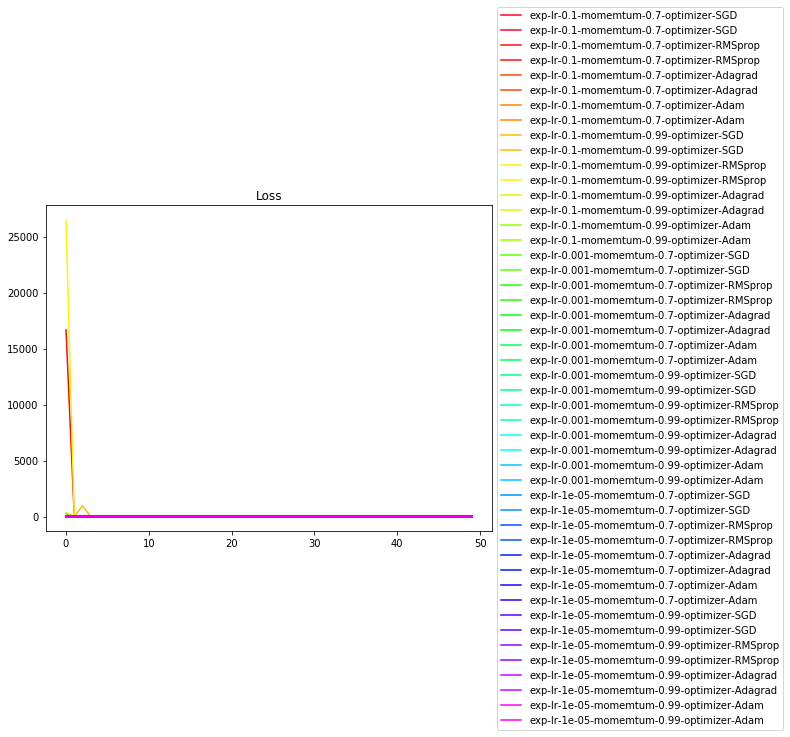

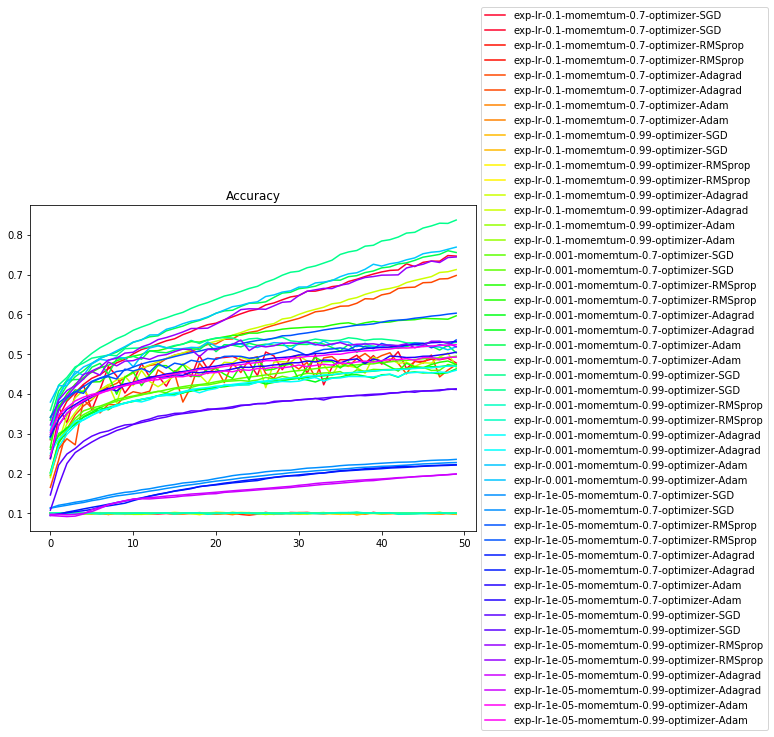

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '-', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])), results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])), results[cond]['valid-acc'], '-', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()